# Long Homework 2

## AMPTH 207: Stochastic Methods for Data Analysis, Inference and Optimization
 
### Long Homework 2
 
**Harvard University**  
**Spring 2017**  
**Instructor: Rahul Dave**  
**Due Date:** Thursday, March 23rd, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1. The Ising Model with Metropolis and Gibbs

The true power of the Monte Carlo method becomes apparent when we deal with integrals over many dimensions, such as those often found in statistical physics. In this exercise we consider the 2-D Ising model, which is a very idealized representation of a ferromagnetic metal. The model consists of an $L\times L$ lattice of spins  $s_{ij}$ (with $i, j = 1, \ldots , L$) each of which can take only two values, up (s$_{ij}$ = 1) and down (s$_{ij}$ = -1). The total energy for the system is taken to be:

$$
E = -\sum_{ij} \frac{1}{2} s_{ij}  \left[ s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)} \right],  
$$

where s$_{\rm{up}(ij)}$ denotes the spin immediately above s$_{ij}$ in the grid, s$_{\rm{right}(ij)}$ the spin immediately to its right, and so on. We see that configurations in which nearby spins are aligned are energetically preferred. When the system is in thermal equilibrium, at the temperature $T$, the probability of finding it in a given configuration $\{s\}=(s_{11}, s_{12}, \ldots)$ of the spins is given by the Boltzmann factor,

$$W(\{{s} \}) = Z^{-1} e^{ -\beta E[ \{ s \} ] }, $$

where $Z$ is given by the sum of the exponential over all possible spin configurations, and where $\beta$ is the inverse temperature (measured in units of the Boltzmann constant $k_B$). The thermal equilibrium values of all the macroscopic quantities for the system (such as the magnetization, $M(\{s\}) =\sum_{ij} s_{ij}$ are found by averaging over all spin configurations, weighted by $W$. For instance,

$$
\left< M \right> := \sum_{\{s\}} W(\{{s} \})M(\{s\})
$$ 

Thus:

$$
\left< M \right> = \sum_{s_{11}=\pm 1} \sum_{s_{12}=\pm 1} \ldots \sum_{s_{LL}=\pm 1} \left[ W(\{s\}) \times \sum_{ij} s_{ij} \right],
$$
Computing thermal equilibrium values using the above equation is effectively out of the reach of standard techniques, but not so if we use Monte Carlo.

### Sampling: Metropolis

The Metropolis algorithm generates a sequence of configurations that have approximately the required probability distribution. This is how it works:

* We start with a completely random spin configuration $\{s \}$ (each spin chosen to be up or down with 50% probability).

* To generate the next configuration in the sequence, we select a point $(i, j$) in the lattice, and we compute the energy change $\Delta E$ by flipping the corresponding spin, s$_{ij}$,

$$
\Delta E = 2s_{ij}  \left[ s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)} \right]  
$$

* if E is zero or negative, we accept the flip (i.e., we always accept changes that lower the total energy). If E is positive, we accept the flip with probability 

$$P (\Delta E) = \exp(-\beta \Delta E).$$ 

We repeat this Metropolis step L $\times$ L times, once for each location $(i, j)$ in the lattice (the repeated Metropolis steps constitute a Metropolis sweep). The updated points are used as they become available.

### Sampling: Gibbs
Since the spins are correlated with their neighbors, it is perhaps more natural to adopt a Gibbs approach. If we select a node $s_{ij}$ in the lattice, it is easy to show using the equations above that the full conditional probability of it having a spin of 1 given all the other spins is:

$$
P(s_{ij}=1\vert\textrm{all other spins}) = \frac{1}{1+\exp\left(-2\beta(s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)})\right)}
$$

So the Gibbs model is to loop over each spin in the lattice, and with the above probability set the current spin to 1, otherwise setting it to −1.

### Monte Carlo
Regardless of the sampling method, the Monte Carlo estimate of the ensemble average of a macroscopic quantity (say M) is then

$$ \left< M \right> = \frac{1}{N} \sum_{k=1}^{N} \sum_{ij} s_{ij}^{(k)} $$

where $ s_{ij}^{(k)}$ is the sequence of the spin configurations obtained as usual by evolving the Markov Chain from the initial configuration. And as usual, its best to omit a certain number of configurations at the beginning of the sequence; these are not distributed with the proper probabilities, because the system has not yet reached thermal equilibrium (stationarity). How long the system takes to thermalize depends on several factors, and the length of the required warm-up period is usually estimated empirically.

### Part A
- Make the assumption of periodic boundary conditions. This means that the right neighbor of last column are the corresponding points in the first column; and the bottom neighbors in the last row are the corresponding points in the first row (picture your lattice as a grid on a flat sheet of paper, where neighbouring points are connected by lines; then draw lines connecting corresponding points on the left and right edges of your sheet; also draw lines connecting corresponding points on the top and bottom edges). 

  Write a program that generates a Gibbs sequence of spin configurations for the  $100 \times 100$ L 2-D Ising model. Visualize the configurations on the screen as they are computed.

- Use the Gibbs estimates to evaluate the energy per particle and magnetization per particle of the 2-D Ising model as a function of temperature, and plot these functions. At some value of $\beta$ you will observe a sudden change in energy and magnetization, called a phase transition. Where does this occur? 

***Hint:*** *first plot the magnetizations and energies as a function of the iteration to make sure they have stabilized*.


### Part B

Now add an external field of magnitude $h > 0$, which can be interpreted as an energy term added to each spin, and repeat the experiment in Part (A).

In this case:

$$
E = -\sum_{ij} \frac{1}{2} s_{ij}  \left[ s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)} \right]  - \sum_{ij} h_{ij} s_{ij}
$$

where $h_{ij}$ is the magnitude of the external field in the $(i,j)$ position of the lattice, and $s_{ij}$ the spin in that location in the lattice. For the sake of simplicity, we will assume that $h$ is constant over the entire lattice. 

Note that the above implies that adjacent spins with the same sign result in lower energy than adjacent spins with opposite signs. Also, if the spin direction and the direction of the external magnetic field are aligned, the energy is reduced.

Use a low temperature, $\beta=1$, and plot the magnetization as a function of the Gibbs itearation for the following values of the external field: $h = -1.0,-0.1,-0.05,0.05,0.1,1.0$. Discuss the effect of adding this external field on the magnetization properties.

## Problem 2. Image de-noising

Suppose we observe a "noisy" image $Y \in \{-1,1\}^L$ (a lattice) based on a "noise-free" image $Z \in \{-1,1\}^L$. We will denote the random variable representing the value at the $i$-pixel in the two images by $Y_i$ and $Z_i$, respectively. A plausible choice for modelling the noise in $Y$ is by using independent bit-flips:


$$
P(Y_i=y_i\vert Z_i=z_i) = P(Z_i=z_i\vert Y_i=y_i) = \left\{
        \begin{array}{ll}
            q & \quad y_i = z_i \\
            1-q & \quad y_i \neq z_i
        \end{array}
    \right.
$$

where $q >0$. Simply put, if the $i$-th pixel $Z_i$ in the noise-free image is a -1, then the $i$-th pixel in $Y$ will be wrong (i.e. $Y_i=1$) with probability $1 - q$.

We want to recover $Z$, the original noise-free image. The problem is hard unless we make an assumption about $Z$. We will assume that the image is "clumpy", i.e., that neighboring pixels are correlated. We can translate this assumption directly into the prior probability of $Z$:

$$
\text{Prior on Lattice }Z = P(Z) \propto \exp \left( \sum_{i,j}z_iz_j\right)
$$

Looks familiar? Yes, that is an Ising model with no external field! Now, applying Bayes' rule, and setting $$h=\log\left(\frac{q}{1-q}\right) = \mathrm{logit}(q),$$ 
we can write the posterior probability as:

$$
\log P(Z\vert Y) \propto \exp \left( \sum_{i,j}z_iz_j + \sum_i h\cdot z_i\cdot y_i \right)
$$

This is exactly an Ising model with a varying external field $h\cdot y_i$. We only need to set $\beta=2$ and halve $h$.

### Part A

Using a Gibbs sampler, de-noise the image contained in the file "noisy_image.pickle" and plot your result. How many Gibbs iterations do you need in order to obtain a clean image?

### P1 PartA - Sampling: Gibbs
<font color = "blue">
Since the spins are correlated with their neighbors, it is perhaps more natural to adopt a Gibbs approach. If we select a node $s_{ij}$ in the lattice, it is easy to show using the equations above that the full conditional probability of it having a spin of 1 given all the other spins is:

$$
P(s_{ij}=1\vert\textrm{all other spins}) = \frac{1}{1+\exp\left(-2\beta(s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)})\right)}
$$

So the Gibbs model is to loop over each spin in the lattice, and with the above probability set the current spin to 1, otherwise setting it to −1.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randint, randn, rand
from scipy import stats
from scipy.stats import norm, gamma
from scipy.stats import distributions
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
# Initialize
Size = 100

field = DataFrame(randint(2,size=(Size,Size))*2-1)
field_matrix = np.zeros((Size,Size))
for i in range(Size):
    field_matrix[:,i] = field[i]
beta = 100

x_direct = Size
y_direct = Size

In [4]:
def expand_field(field_matrix):
    Size = 100
    x_direct = Size
    y_direct = Size
    field_expand = np.zeros((x_direct+2,y_direct+2))
    field_expand[Size+1,1:Size+1] = field_matrix[0,:]
    field_expand[0,1:Size+1] = field_matrix[Size-1,:]
    field_expand[1:Size+1,Size+1] = field_matrix[:,0]
    field_expand[1:Size+1,0] = field_matrix[:,Size-1]
    field_expand[1:Size+1,1:Size+1] = field_matrix
    return field_expand

def update_field(field_matrix,beta):
    for i in range(1,x_direct+1):
        for j in range(1,y_direct+1):
            field_expand = expand_field(field_matrix)
            prob = 1./(1. + np.exp(-2*beta*(field_expand[i-1,j] + field_expand[i+1,j] + field_expand[i,j-1] + field_expand[i,j+1])))
            if np.random.uniform() < min(1, prob): 
                field_matrix[i-1][j-1] = 1
            else:
                field_matrix[i-1][j-1] = -1
                
    return field_matrix

def energy_fun(field_expand):
    E = 0
    for i in range(1,x_direct+1):
        for j in range(1,y_direct+1):
            E = E - 0.5 * field_expand[i,j] * (field_expand[i-1,j] + field_expand[i+1,j] + field_expand[i,j-1] + field_expand[i,j+1])
    return E

def mag(field_matrix,beta):
    return np.sum(field_matrix)/(Size*Size)

def gibbs_sampling(ite,beta):
    field = DataFrame(randint(2,size=(Size,Size))*2-1)
    field_matrix = np.zeros((Size,Size))
    for i in range(Size):
        field_matrix[:,i] = field[i]
    
    field_ite = []
    field_ite.append(field_matrix.copy())
   # field_ite.append(field_matrix)
    for i in range(ite):       
        field_ite.append(update_field(field_matrix,beta).copy())
        #print (update_field(field_matrix))
    return field_ite

    
def transition(beta):
    ite = 2000
    magnetization = []
    energy_list = []
    #field_ite = gibbs_sampling(ite)
    mag_acc = 0 
    field_ite = gibbs_sampling(ite,beta)
    for i in range (ite):
        field_each = field_ite[i]
        field_each_expand = expand_field(field_each)
        #mag_acc += mag(field_each,beta)
        #mag_acc_avg = mag_acc/(i+1)
        magnetization.append(mag(field_each,beta))
        #energy_list.append(energy(field_each_expand))
        energy_list.append(energy_fun(field_each_expand))
    return magnetization,energy_list  

<font color = "blue">
 ### Visualize the configurations

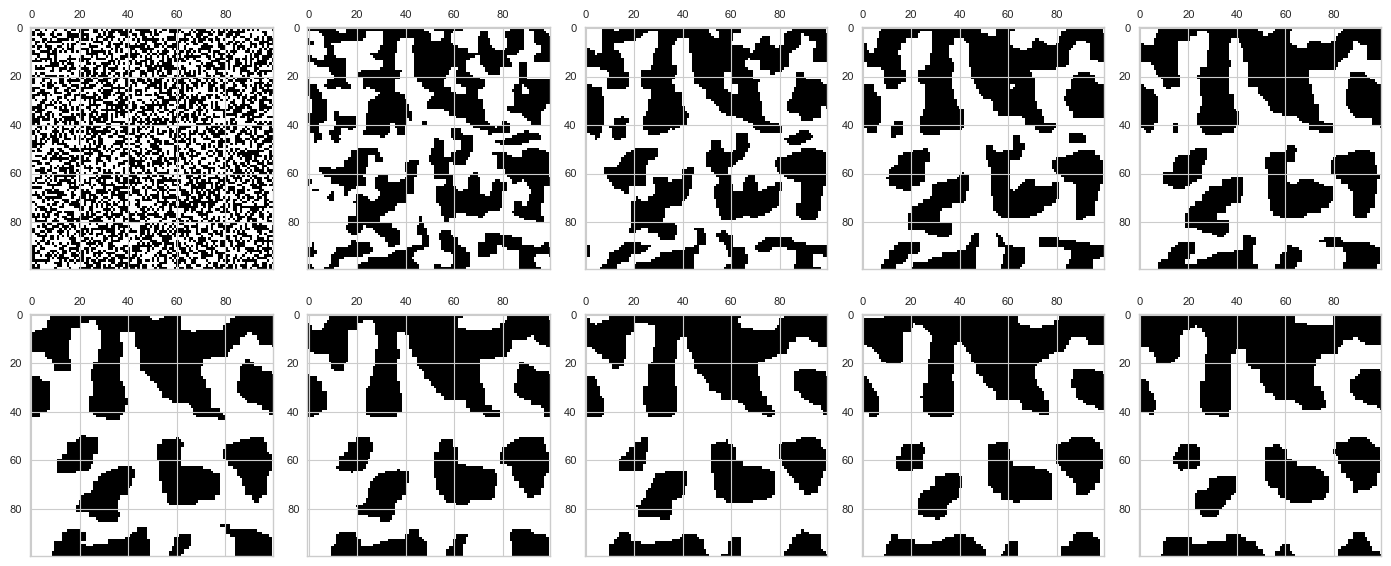

In [7]:
ite = 50
field_ite = gibbs_sampling(ite,beta)
fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()
n = 0
for i in range(ite):   
    axes[i].matshow(field_ite[n])
    n +=5
    if n>= ite:
        break
plt.tight_layout()


<font color = "blue">
### Summay
As shown in the plots above, the plot can converge after a few steps. The points have changed from random state to correlated association states

Use the Gibbs estimates to evaluate the energy per particle and magnetization per particle of the 2-D Ising model as a function of temperature, and plot these functions. At some value of  β  you will observe a sudden change in energy and magnetization, called a phase transition. Where does this occur?
Hint: first plot the magnetizations and energies as a function of the iteration to make sure they have stabilized.

### P1 Part A - Transition
<font color = "blue">

In [8]:
beta = (1./np.linspace(1, 5, 10))[::-1]


m_list = []
e_list = []
for i in range (len(beta)):
    ma,en = transition(beta[i])
    #print(ma)
    m_list.append(ma)
    e_list.append(en)



In [48]:
m =[]
e = []
for i in range(len(beta)):
    m.append(m_list[i][-1])
    e.append(e_list[i][-1])


<font color = "blue">

### Valualiza the phase transition

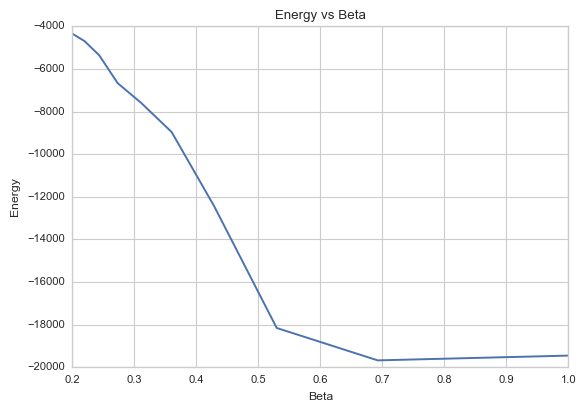

In [11]:
plt.plot(beta,e)
plt.title('Energy vs Beta')
plt.ylabel('Energy')
plt.xlabel('Beta')
plt.show()

<font color = "blue">
### The converge condition of energy w.r.t the value of beta

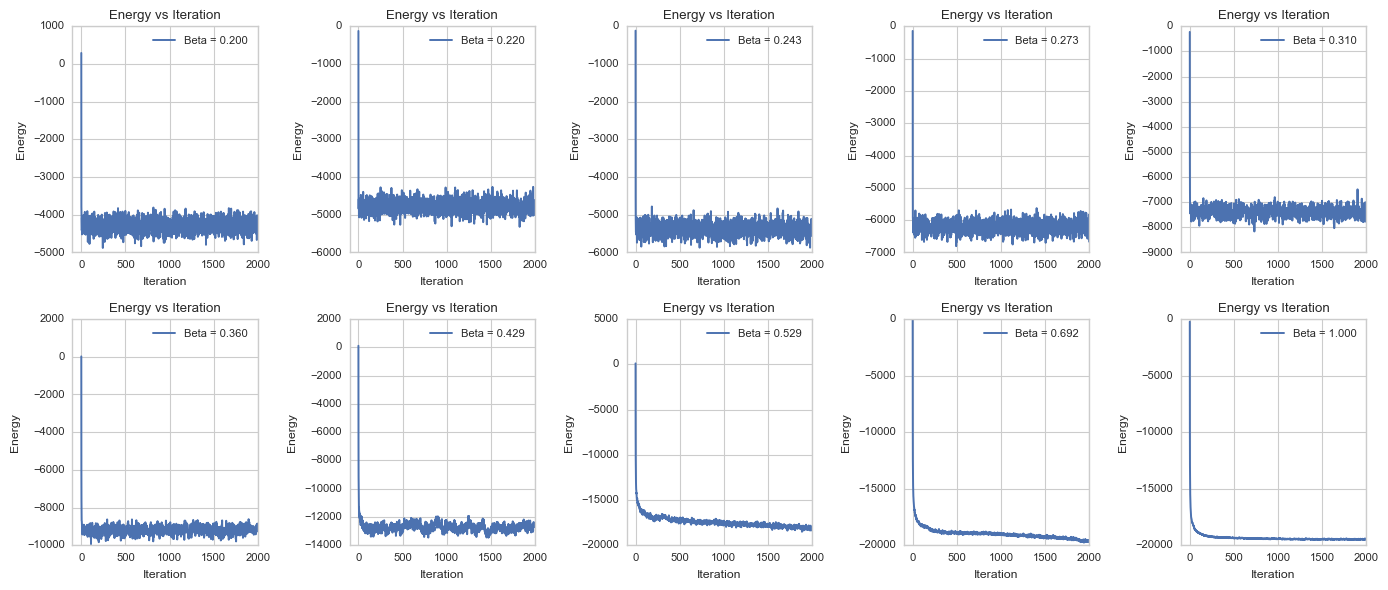

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()

for i in range(len(beta)):   
    axes[i].plot(e_list[i],label = 'Beta = %.3f'%(beta[i]) )
    axes[i].set_title('Energy vs Iteration')
    #plt.title('energy vs beta')
    axes[i].set_xlim(-100,2000)
    axes[i].set_ylabel('Energy')
    axes[i].set_xlabel('Iteration')
    axes[i].legend()

#plt.title('magnetization vs beta')
plt.tight_layout() 

<font color = "blue">
### Summary for energy transition

As shown in the transition plot (energy w.r.t beta) and the converge plot(energy w.r.t iterations), the energy can converge after a few steps. For every beta, I chose the last value of each energy sequence and plotted all the ten points out. It can be found that there exists a transition when the beta is around 0.6.

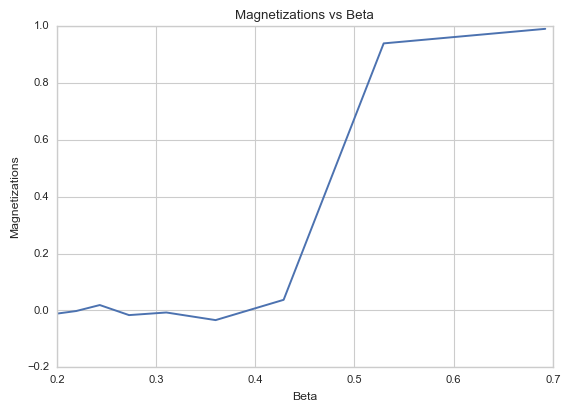

In [49]:
beta = (1./np.linspace(1, 5, 10))[::-1]
plt.plot(beta[:9],m[:9])
plt.title('Magnetizations vs Beta')
plt.ylabel('Magnetizations')
plt.xlabel('Beta')
plt.show()

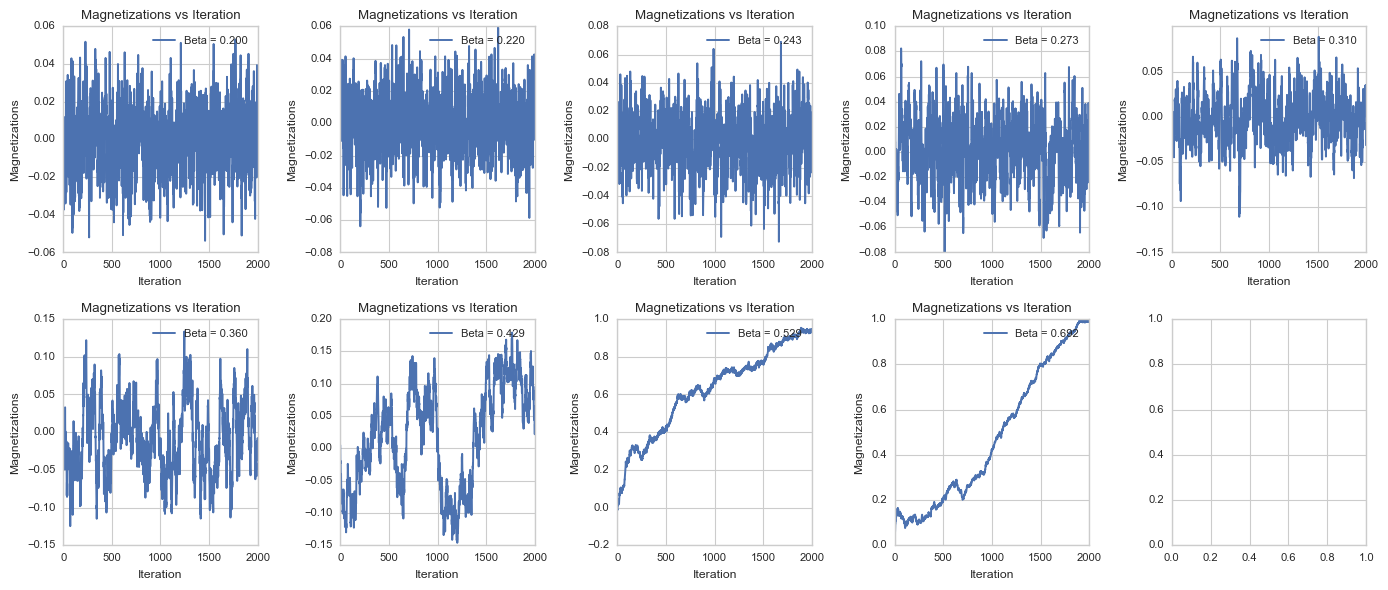

In [34]:
fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()

for i in range(len(beta)-1):   
    axes[i].plot(m_list[i],label = 'Beta = %.3f'%(beta[i]))
    axes[i].set_title('Magnetizations vs Iteration')
    #plt.title('energy vs beta')
    #axes[i].set_xlim(-100,2000)
    #axes[i].set_ylim(-1,0.5)
    axes[i].set_ylabel('Magnetizations')
    axes[i].set_xlabel('Iteration')
    axes[i].legend()
#plt.title('magnetization vs beta')
plt.tight_layout() 

<font color = "blue">
### Summary for magnetization transition


As shown in the transition plot (magnetization w.r.t beta) and the converge plot(energy w.r.t iterations), it take a really long time to make sure that the magnetization can converage when the beta becomes larger. However, in some scenarios that the beta is between 0.3 and 0.5, after running 2000 steps, the magnetization still could not converge. I chose the last value of each magnetization sequence and plotted all the ten points out. It can be found that there exists a transition when the beta is around 0.5. 

### Part B

Now add an external field of magnitude $h > 0$, which can be interpreted as an energy term added to each spin, and repeat the experiment in Part (A).

In this case:

$$
E = -\sum_{ij} \frac{1}{2} s_{ij}  \left[ s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)} \right]  - \sum_{ij} h_{ij} s_{ij}
$$

where $h_{ij}$ is the magnitude of the external field in the $(i,j)$ position of the lattice, and $s_{ij}$ the spin in that location in the lattice. For the sake of simplicity, we will assume that $h$ is constant over the entire lattice. 

Note that the above implies that adjacent spins with the same sign result in lower energy than adjacent spins with opposite signs. Also, if the spin direction and the direction of the external magnetic field are aligned, the energy is reduced.

Use a low temperature, $\beta=1$, and plot the magnetization as a function of the Gibbs itearation for the following values of the external field: $h = -1.0,-0.1,-0.05,0.05,0.1,1.0$. Discuss the effect of adding this external field on the magnetization properties.

### P1 Part B
<font color = "blue">
### After adding  external field

In [35]:
def update_field_new(field_matrix,h_val,beta):
    for i in range(1,x_direct+1):
        for j in range(1,y_direct+1):
            field_expand = expand_field(field_matrix)
            prob = 1./(1. + np.exp(-2*beta*(field_expand[i-1,j] + field_expand[i+1,j] + field_expand[i,j-1] + field_expand[i,j+1] + h_val)))
            if np.random.uniform() < min(1, prob): 
                field_matrix[i-1][j-1] = 1
            else:
                field_matrix[i-1][j-1] = -1
                
    return field_matrix

In [36]:
def gibbs_sampling_new(ite,h_val,beta):
    field = DataFrame(randint(2,size=(Size,Size))*2-1)
    field_matrix = np.zeros((Size,Size))
    for i in range(Size):
        field_matrix[:,i] = field[i]   
    field_ite = []
    field_ite.append(field_matrix.copy())
    for i in range(ite):       
        field_ite.append(update_field_new(field_matrix,h_val,beta).copy())
    return field_ite


In [50]:
h = [-1.0,-0.1,-0.05,0.05,0.1,1.0]
def energy_fun_new(field_expand,h_val,beta):
    E = 0
    for i in range(1,x_direct+1):
        for j in range(1,y_direct+1):
            E = E - 0.5 * field_expand[i,j] * (field_expand[i-1,j] + field_expand[i+1,j] + field_expand[i,j-1] + field_expand[i,j+1])-h_val*field_expand[i,j]       
    return E

ite = 100
beta = 1.
magnetization = []
energy_list = []
mag_acc = 0 
for j in range(len(h)):
    field_ite = gibbs_sampling_new(ite,h[j],beta)
    m = []
    e = []
    for i in range (ite):
        field_each = field_ite[i]
        field_each_expand = expand_field(field_each)
        #mag_acc += mag(field_each)
        #mag_acc_avg = mag_acc/(i+1)
        m.append(mag(field_each,beta))
        e.append(energy_fun_new(field_each_expand,h[j],beta))
    magnetization.append(m)
    energy_list.append(e)

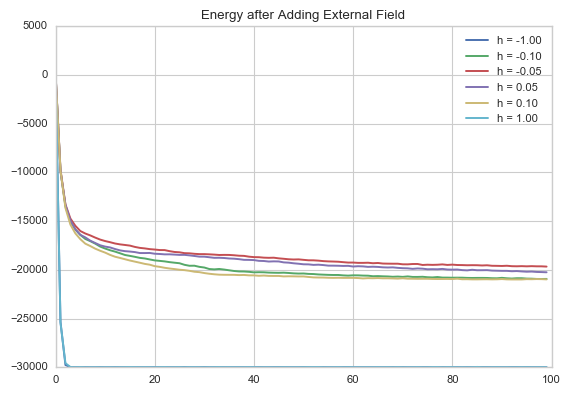

In [51]:
for i in range (len(h)):
    plt.plot(energy_list[i],label = 'h = %.2f'%h[i])
plt.legend()
plt.title('Energy after Adding External Field')

<font color = "blue">
### Summary

The energy has the similar performance as the previous case, it can always become stable after a few iterations.

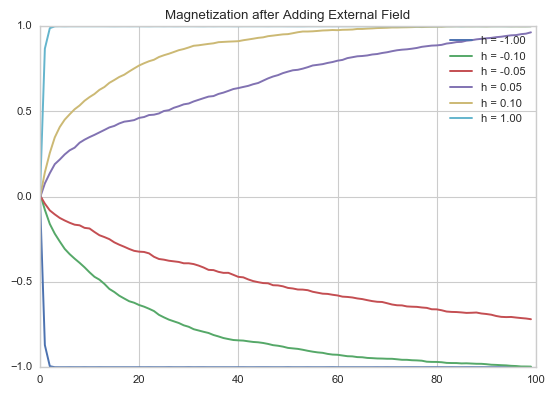

In [52]:
for i in range (len(h)):
    plt.plot(magnetization[i],label = 'h = %.2f'%h[i])
plt.legend()
plt.title('Magnetization after Adding External Field')

<font color = "blue">
### Summary



After adding this external field, the magnetization can finally converge unlike the previous case without external field. Before coming to converge area when h < 0, magnefization is decreasing. It decreases faster when the absolute value of h is large. On the other hand,  when h > 0, magnefization is increasing. It increases faster when the absolute value of h is large.

## Problem 2. Image de-noising

Suppose we observe a "noisy" image $Y \in \{-1,1\}^L$ (a lattice) based on a "noise-free" image $Z \in \{-1,1\}^L$. We will denote the random variable representing the value at the $i$-pixel in the two images by $Y_i$ and $Z_i$, respectively. A plausible choice for modelling the noise in $Y$ is by using independent bit-flips:


$$
P(Y_i=y_i\vert Z_i=z_i) = P(Z_i=z_i\vert Y_i=y_i) = \left\{
        \begin{array}{ll}
            q & \quad y_i = z_i \\
            1-q & \quad y_i \neq z_i
        \end{array}
    \right.
$$

where $q >0$. Simply put, if the $i$-th pixel $Z_i$ in the noise-free image is a -1, then the $i$-th pixel in $Y$ will be wrong (i.e. $Y_i=1$) with probability $1 - q$.

We want to recover $Z$, the original noise-free image. The problem is hard unless we make an assumption about $Z$. We will assume that the image is "clumpy", i.e., that neighboring pixels are correlated. We can translate this assumption directly into the prior probability of $Z$:

$$
\text{Prior on Lattice }Z = P(Z) \propto \exp \left( \sum_{i,j}z_iz_j\right)
$$

Looks familiar? Yes, that is an Ising model with no external field! Now, applying Bayes' rule, and setting $$h=\log\left(\frac{q}{1-q}\right) = \mathrm{logit}(q),$$ 
we can write the posterior probability as:

$$
\log P(Z\vert Y) \propto \exp \left( \sum_{i,j}z_iz_j + \sum_i h\cdot z_i\cdot y_i \right)
$$

This is exactly an Ising model with a varying external field $h\cdot y_i$. We only need to set $\beta=2$ and halve $h$.

### Part A

Using a Gibbs sampler, de-noise the image contained in the file "noisy_image.pickle" and plot your result. How many Gibbs iterations do you need in order to obtain a clean image?

In [40]:
import pickle

<function matplotlib.pyplot.show>

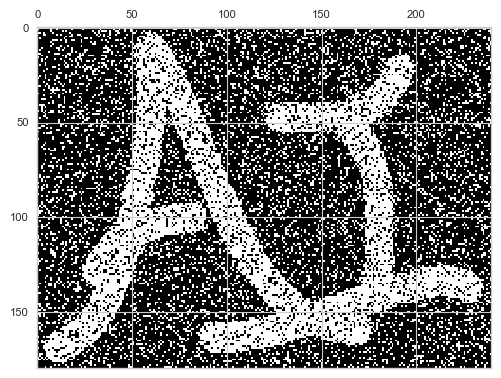

In [41]:
data = pickle.load( open( "noisy_image.pickle", "rb" ) )
data.shape
plt.matshow(data)
plt.show

In [42]:
def expand_field1(field_matrix):
    x_direct = 180
    y_direct = 240
    field_expand = np.zeros((x_direct+2,y_direct+2))
    field_expand[x_direct+1,1:y_direct+1] = field_matrix[0,:]
    field_expand[0,1:y_direct+1] = field_matrix[x_direct-1,:]
    field_expand[1:x_direct+1,y_direct+1] = field_matrix[:,0]
    field_expand[1:x_direct+1,0] = field_matrix[:,y_direct-1]
    field_expand[1:x_direct+1,1:y_direct+1] = field_matrix
    return field_expand



def update_field_new1(field_matrix,h_val,beta):
    x_direct = 180
    y_direct = 240
    for i in range(1,x_direct+1):
        for j in range(1,y_direct+1):
            field_expand = expand_field1(field_matrix)
            prob = 1./(1. + np.exp(-2*beta*(field_expand[i-1,j] + field_expand[i+1,j] + field_expand[i,j-1] + field_expand[i,j+1] + h_val[i-1,j-1])))
            if np.random.uniform() < min(1, prob): 
                field_matrix[i-1][j-1] = 1
            else:
                field_matrix[i-1][j-1] = -1
                
    return field_matrix

def construct_noisemodel(data):
    x_direct = 180
    y_direct = 240
    q = 0.2
    image_matrix = np.zeros((x_direct,y_direct))
    for i in range(xsize):
        for j in range(ysize):
            if (np.random.uniform() < q):
                image_matrix[i,j] = data[i,j]
            else:
                image_matrix[i,j] = -data[i,j]  
    h_val = (q/(1-q))  
    return image_matrix, h_val

def gibbs_sampling_new1(ite,beta,h1,data):
    x_direct = 180
    y_direct = 240
    field_ite = []
    data_copy = data
    field_ite.append(data.copy())
    for i in range(1,ite):       
        field_ite.append(update_field_new1(data_copy,h1,beta).copy())
        if (np.array_equal(field_ite[i],field_ite[i-1]) == True):
            print ('It ends at step: ',i)
            break
            
    return field_ite



In [43]:
ite = 50
beta = 2.
magnetization = []
energy_list = []
mag_acc = 0 
h1 = 0.5 * data

field_ite = gibbs_sampling_new1(ite,beta,h1,data)
m = []
e = []



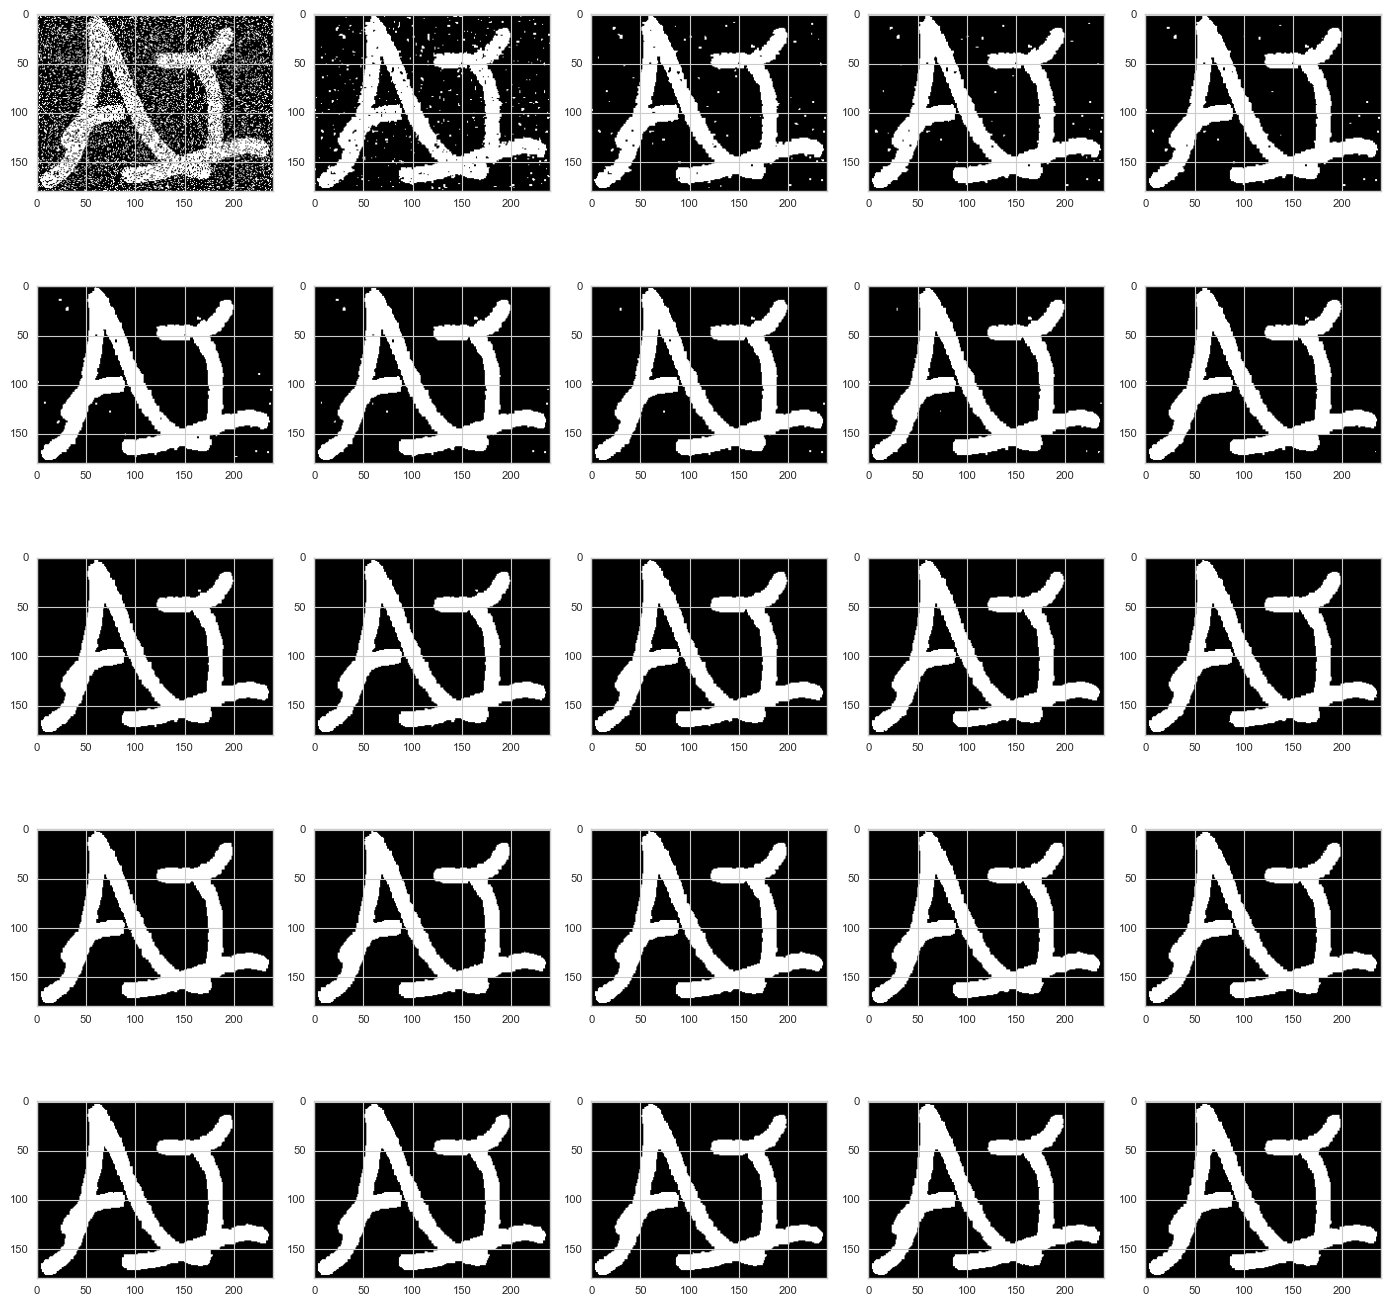

In [44]:
fig, axes = plt.subplots(5, 5, figsize=(14,14))
axes = axes.ravel()
n = 0
for i in range(25):   
    axes[i].imshow(field_ite[n])
    n +=1
    if n>= ite:
        break
plt.tight_layout()

<font color = "blue">
### Summary

Basically, at step 13, the graph can converge to a clear AI pattern